# Optional Task

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

C:\Users\ryan.harrison\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [7]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [8]:
# Pre-processing
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, BatchNormalization, SpatialDropout1D, Flatten

# Write some code to pre-process the data so that each review is the same length
trimmed_data = keras.preprocessing.sequence.pad_sequences(tokenized_data, maxlen=4, dtype="int32", padding="post", value=0.0)
print(trimmed_data[0:5])

[[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 [ 6  4  0  0]
 [ 1 12  3  0]]


In [9]:
from sklearn.model_selection import train_test_split
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.
X = trimmed_data
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(input_model, test_X, test_y):
    # Make predictions on the model.
    y_pred = input_model.predict(test_X)
    
    # Get the precision.
    precision = precision_score(to_class(test_y), to_class(y_pred))
    
    # Get the recall.
    recall = recall_score(to_class(test_y), to_class(y_pred))
    
    # Get the f1 score.
    f1 = f1_score(to_class(test_y), to_class(y_pred))
    
    # Get the confusion matrix.
    confusion = confusion_matrix(to_class(test_y), to_class(y_pred))
    
    # Print the results
    print("precision_score:\n{}\n\nrecall_score:\n{}\n\nf1_score:\n{}\n\nconfusion_matrix:\n{}\n\n".format(precision,
                                                                                                           recall,
                                                                                                           f1,
                                                                                                           confusion))

# Build and tune model

Define network architecture

In [11]:
# Create model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=len(data), output_dim=1000, input_length=4))

# Spatial Dropout
model.add(SpatialDropout1D(0.2))

# Batch Normalisation
model.add(BatchNormalization())

# LSTM
model.add(Flatten())

# Dense
model.add(Dense(32, activation="relu"))

# Dense
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 1000)           1793000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 4, 1000)          0         
 ropout1D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 4, 1000)          4000      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 32)                128032    
                                                                 
 dense_1 (Dense)             (None, 2)                 6

Train model

In [12]:
# Train
model_history = model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/5
144/144 [==============================] - 2s 11ms/step - loss: 0.7609 - accuracy: 0.5397 - val_loss: 0.6913 - val_accuracy: 0.5850
Epoch 2/5
144/144 [==============================] - 2s 11ms/step - loss: 0.6695 - accuracy: 0.5802 - val_loss: 0.6815 - val_accuracy: 0.5822
Epoch 3/5
144/144 [==============================] - 2s 11ms/step - loss: 0.6271 - accuracy: 0.6053 - val_loss: 0.6739 - val_accuracy: 0.5850
Epoch 4/5
144/144 [==============================] - 1s 10ms/step - loss: 0.6196 - accuracy: 0.6172 - val_loss: 0.6843 - val_accuracy: 0.5877
Epoch 5/5
144/144 [==============================] - 2s 11ms/step - loss: 0.6054 - accuracy: 0.6137 - val_loss: 0.7103 - val_accuracy: 0.6045


Examine performance of model

In [13]:
assess_model(input_model=model, test_X=X_test, test_y=y_test)

12/12 [==============================] - 0s 863us/step
precision_score:
0.5729537366548043

recall_score:
0.8797814207650273

f1_score:
0.6939655172413793

confusion_matrix:
[[ 56 120]
 [ 22 161]]




Plot graphs for accuracy and loss

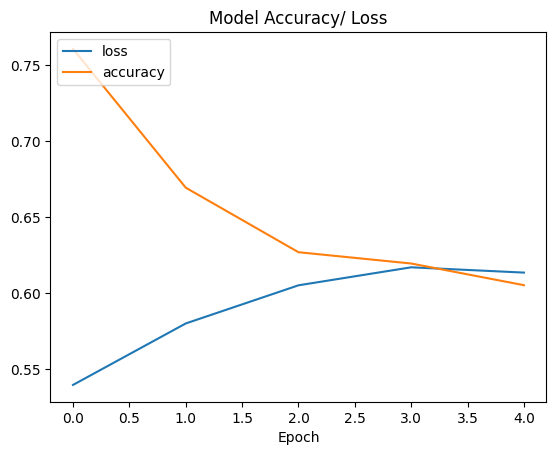

In [14]:
# Get the accuracy from the history of the model and plot.
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["loss"])
plt.title("Model Accuracy/ Loss")
plt.xlabel("Epoch")
plt.legend(["loss", "accuracy"], loc='upper left')
plt.show()

# Make a prediction

In [15]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = keras.preprocessing.sequence.pad_sequences(tokenized, padding="post", maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.
custom_predictions = model.predict(padded)
prediction_results = to_word_label(y=custom_predictions)

1/1 [==============================] - 0s 12ms/step


In [16]:
print(prediction_results)

['negative', 'positive', 'positive', 'positive', 'negative']


# Custom sentence predictions

In [17]:
# This is a very small set of completed new data to use to make predictions.
prediction_data_2 = ["amazing book", "would not recommend", "would highly recommend", "unlikely success"]
tokenized_2 = tokenizer.texts_to_sequences(prediction_data_2)
padded_2 = keras.preprocessing.sequence.pad_sequences(tokenized_2, padding="post", maxlen=4)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.
custom_predictions_2 = model.predict(padded_2)
prediction_results_2 = to_word_label(y=custom_predictions_2)

print(prediction_results_2)

1/1 [==============================] - 0s 13ms/step
['negative', 'negative', 'negative', 'negative']


# Summary

The fully connected model does not seem to perform better than the original. We can see that it reviewed all of the custom sentences as negative. In the other predictions, it only got one of the reviews correct, which is not good.